In [3]:
import math
import random
#Benötigte Pakete

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle 
import seaborn as sns
from scipy import stats
from decimal import Decimal

import matplotlib.mlab as mlab
import numpy as np
import cmath

from numpy import linalg as LA
import scipy
from scipy import spatial
import time
#import tables

import os
#import h5py

from matplotlib import animation
import matplotlib
from scipy.optimize import curve_fit
from matplotlib import rc

import gc
import sys
gc.enable()
import copy

from mpl_toolkits import mplot3d

from scipy.odr import *

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as integrate
from scipy.integrate import quad, dblquad

In [4]:
import sys
sys.path.append('../')
from init_atoms import *

In [5]:
global radius

number_atoms=5000
density= 0.01
r_b=5
radius=np.sqrt(number_atoms*r_b**2/density)

atoms_001= produce_atoms(number_atoms,radius,r_b)
distance_matrix_001= scipy.spatial.distance.cdist(atoms_001, atoms_001, metric='euclidean')


number_atoms=5000
density= 0.4
r_b=5
radius=np.sqrt(number_atoms*r_b**2/density)

atoms_04= produce_atoms(number_atoms,radius,r_b)
distance_matrix_04= scipy.spatial.distance.cdist(atoms_04, atoms_04, metric='euclidean')
for i in range(5000):
    distance_matrix_04[i][i]=10
V=1/distance_matrix_04

#histogramm2d with NonUniformImage 

(0, 0.03)

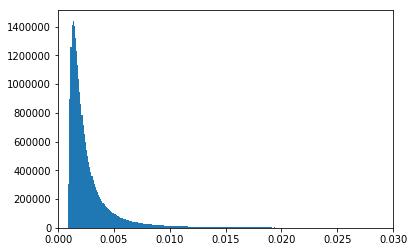

In [6]:
plt.hist(V.ravel(), bins=1000);
plt.xlim(0,0.03)

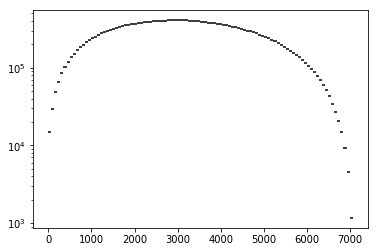

In [82]:
hist, bin_edges = np.histogram(distance_matrix_001.ravel(), bins=100)
plt.yscale("log")
plt.hlines(hist, bin_edges[:-1],bin_edges[1:])

hist, bin_edges = np.histogram(distance_matrix_04.ravel(), bins=100)
#plt.hlines(hist, bin_edges[:-1],bin_edges[1:])

/home/jp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in power
  del sys.path[0]


b=  1.0887341067207492


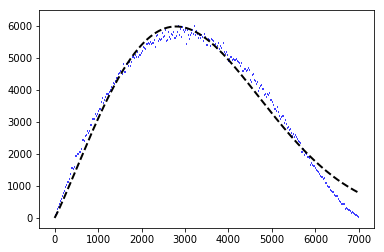

In [79]:
#def gaus(x,a,x0,sigma):
#    return a*np.exp(-(x-x0)**2/(2*sigma**2))
#popt,pcov = curve_fit(gaus,x[:-1],hist,p0=[1,3000,2000])
#plt.plot(x,gaus(x,*popt), color="black", linestyle = "--", linewidth=2);


x=np.arange(0,7000,1)
hist, bin_edges = np.histogram(distance_matrix_001.ravel(), bins=x)
plt.hlines(hist, bin_edges[:-1],bin_edges[1:],color="blue")

def brody(s,b,c,k):
    a= math.pow(scipy.special.gamma((b+2)/(b+1)),b+1)
    return k*a*(b+1)*(s*c)**b*np.exp(-a*(s*c)**(b+1))

popt,pcov = curve_fit(brody,x[:-1],hist,p0=[1,0.0006,100000])


plt.plot(x,brody(x,*popt), color="black", linestyle = "--", linewidth=2);

print("b= ",popt[0])

/home/jp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


b=  0.014608935255553648


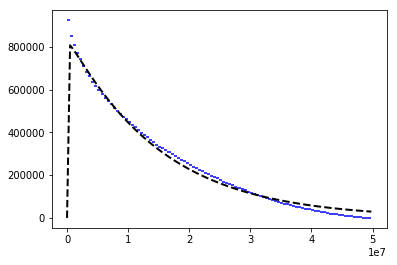

In [78]:
x=np.arange(0,10**7,1000)
hist, bin_edges = np.histogram(distance_matrix_001.ravel()**2, bins=100)
plt.hlines(hist, bin_edges[:-1],bin_edges[1:],color="blue")

def brody(s,b,c,k):
    a= math.pow(scipy.special.gamma((b+2)/(b+1)),b+1)
    return k*a*(b+1)*(s*c)**b*np.exp(-a*(s*c)**(b+1))

popt,pcov = curve_fit(brody,bin_edges[:-1],hist,p0=[1,0.00000006,10**6])

plt.plot(bin_edges,brody(bin_edges,*popt), color="black", linestyle = "--", linewidth=2);
print("b= ",popt[0])